In [633]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

## Analisis de sentimientos

In [634]:
dataset_sentimientos = pd.read_csv('./databases/sentimientos.csv')

In [635]:
stopwords = ['hoy','me','siento','como','lo','de','una','dia','en','para','la','el','encuentro','del','fue','fueron','eso','esos','su','sus','para','dias',
             'a','muy']
dataset_sentimientos.head()

,clase,frase
0,0,me siento un poco nostalgico hoy.
1,0,"todo parece tan gris, como si algo faltara."
2,0,"no tengo ganas de hacer nada, estoy algo decaido."
3,0,echo de menos esos tiempos felices que ya no v...
4,0,"me invade una sensacion de tristeza, sin motiv..."


In [636]:
model = TfidfVectorizer(stop_words=stopwords)

labels = [(0, "Melancolico"), (1, "Ni fu Ni fa"), (2, "Alegre")]

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(dataset_sentimientos['frase'].to_list(), dataset_sentimientos['clase'].to_list(), test_size=0.2, shuffle=True, random_state=42)

# Obtenemos los embeddings de BERT para los conjuntos de entrenamiento y prueba
X_train_vectorized = model.fit_transform(X_train)
X_test_vectorized = model.transform(X_test)

# Creación y entrenamiento del modelo de Regresión Logística Multinomial
modelo_LR = LogisticRegression(max_iter=100, solver='lbfgs')
modelo_LR.fit(X_train_vectorized, y_train)

# Evaluación del modelo de Regresión Logística
y_pred_LR = modelo_LR.predict(X_test_vectorized)
acc_LR = accuracy_score(y_test, y_pred_LR)
report_LR = classification_report(y_test, y_pred_LR, zero_division=1)

print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)


Precisión Regresión Logística: 0.9354838709677419
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.94        31
   macro avg       0.94      0.94      0.94        31
weighted avg       0.94      0.94      0.94        31



In [637]:
for i in range(len(y_test)):
    if y_test[i] != y_pred_LR[i]:
        print(f"Diferencia encontrada en el índice {i}:")
        print(f"X_test: {X_test[i]}")
        print(f"y_test: {y_test[i]}")
        print(f"y_pred_LR: {y_pred_LR[i]}")
        print()  # Línea en blanco para separar las salidas

Diferencia encontrada en el índice 22:
X_test: hoy fue uno de esos dias en los que todo parece brillar un poco mas.
y_test: 2
y_pred_LR: 0

Diferencia encontrada en el índice 25:
X_test: me siento atrapado en pensamientos del pasado, sin poder avanzar.
y_test: 0
y_pred_LR: 1



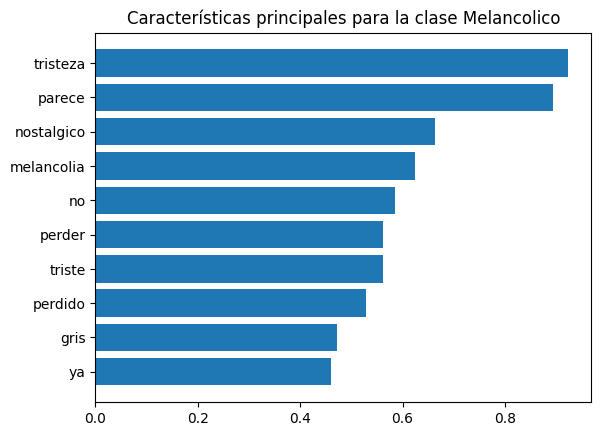

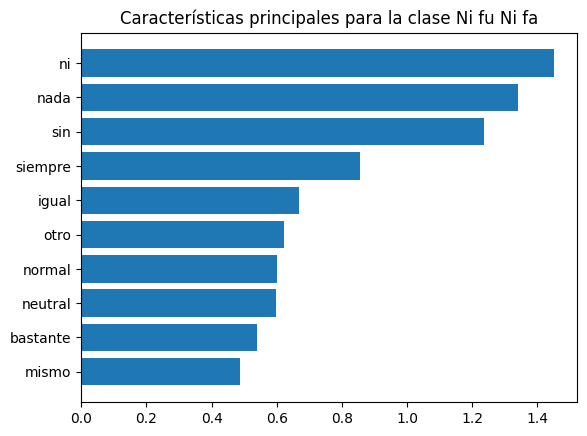

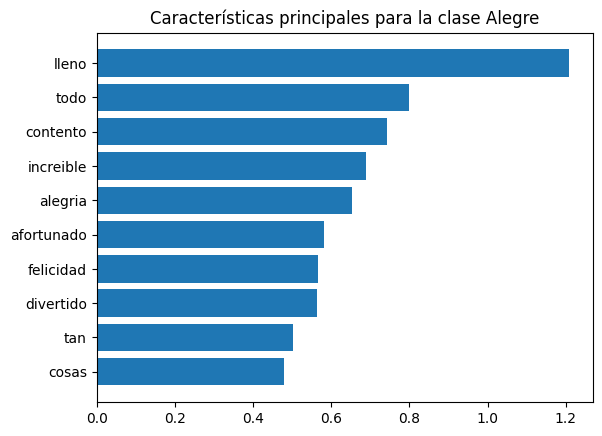

In [638]:
# Obtén los nombres de las características y los coeficientes
feature_names = model.get_feature_names_out()
coef = modelo_LR.coef_

# Visualiza los coeficientes más importantes para cada clase
num_top_features = 10
for i, label in labels:
    top_features_idx = np.argsort(coef[i])[-num_top_features:]
    top_features_names = [feature_names[j] for j in top_features_idx]
    top_features_coef = coef[i][top_features_idx]
    
    plt.figure()
    plt.barh(top_features_names, top_features_coef)
    plt.title(f'Características principales para la clase {label}')
    plt.show()